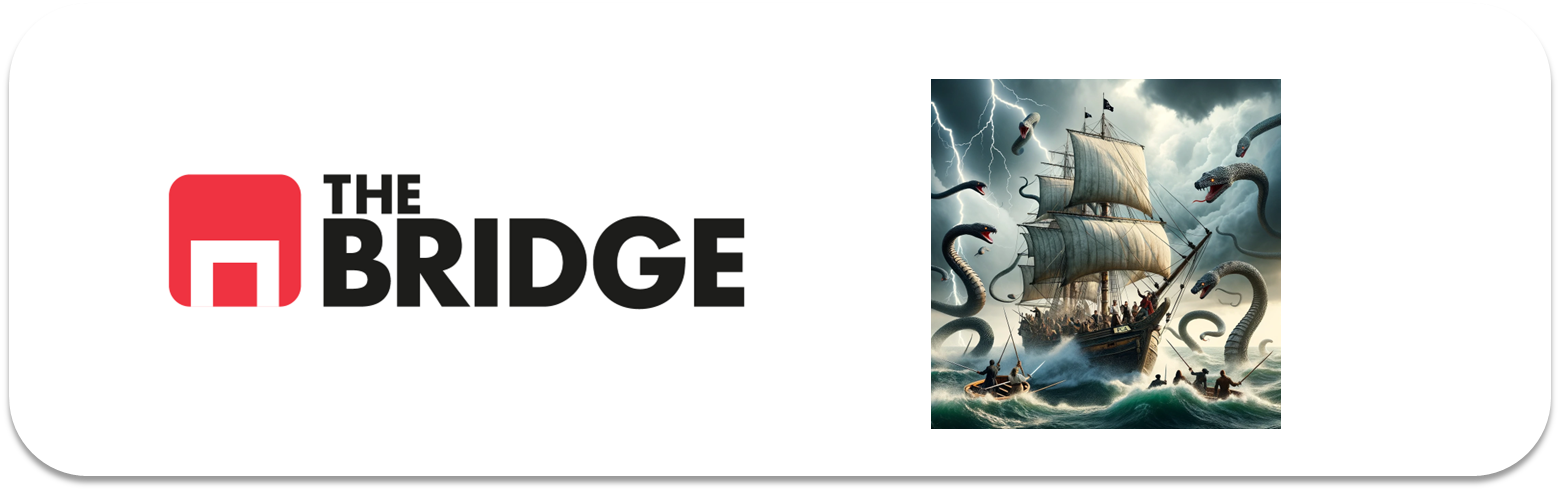

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from collections import Counter

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [ ]:
# 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [3]:
path = "./data/credit_npo.csv"
df = pd.read_csv(path)

In [4]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [5]:
df_clean = df.dropna().copy()
print("\nDimensiones tras eliminar nulos:", df_clean.shape)


Dimensiones tras eliminar nulos: (11816, 11)


In [6]:
numberof_cols = [col for col in df_clean.columns if col.startswith("NumberOf")]
print("\nColumnas 'NumberOf':", numberof_cols)


Columnas 'NumberOf': ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [7]:
# Función para convertir a categórica. 

def numberof_to_cat(series):
    return pd.cut(
        series,
        bins=[-1, 0, 2, np.inf],
        labels=["0", "1-2", "3+"],
    )

In [8]:
for col in numberof_cols:
    df_clean[col + "_cat"] = numberof_to_cat(df_clean[col])
    df_clean.drop(columns=col, inplace=True)

In [12]:
df_clean

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse_cat,NumberOfOpenCreditLinesAndLoans_cat,NumberOfTimes90DaysLate_cat,NumberOfTime60-89DaysPastDueNotWorse_cat,NumberOfDependents_cat
0,0,0.081892,37,0.070709,5656.0,0,0,3+,1-2,0,0
1,0,0.023413,74,0.209197,4870.0,1,0,3+,0,0,0
2,0,0.000000,43,0.080784,5000.0,0,0,1-2,0,0,1-2
3,0,0.492754,44,0.412735,7333.0,2,0,3+,0,0,3+
4,0,1.000000,63,0.000000,8333.0,0,0,3+,0,0,1-2
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0.290216,5140.0,1,0,3+,0,0,0
12533,0,0.036726,62,0.884985,5833.0,1,0,3+,0,0,0
12534,0,0.120313,49,0.577676,6333.0,2,0,3+,0,0,1-2
12535,0,0.252566,63,0.037640,14000.0,0,0,3+,0,0,1-2


In [13]:
# 2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
#    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
#    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
#    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
#    4. Selección de las mejores features empleando RFE.
#    5. Selección de las mejores features empleando SFS.
#    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.
#
#    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [15]:
# Separar target y features
target = "SeriousDlqin2yrs"

# Separar numéricas y categóricas
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove(target)

cat_cols = df_clean.select_dtypes(include=["category"]).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberRealEstateLoansOrLines']
Variables categóricas: ['NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfOpenCreditLinesAndLoans_cat', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfDependents_cat']


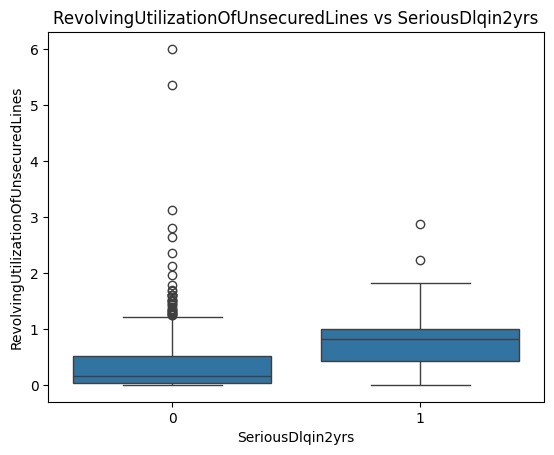

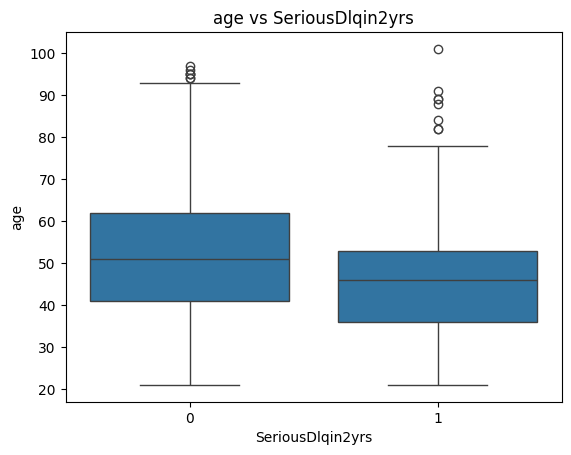

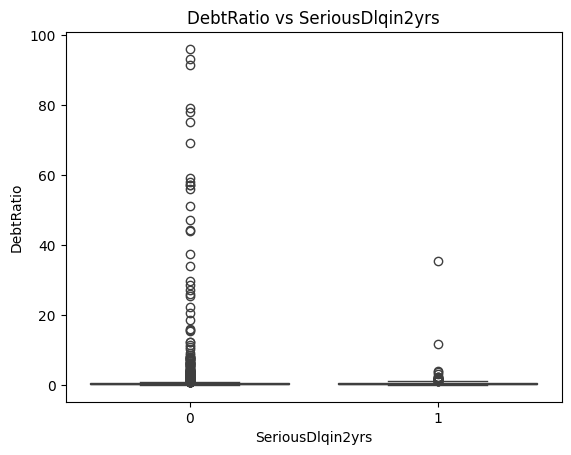

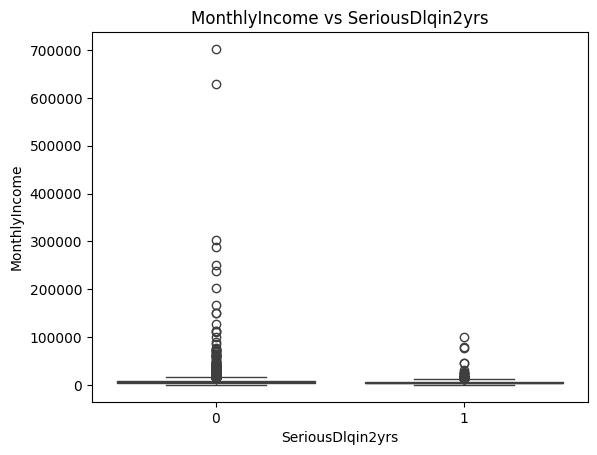

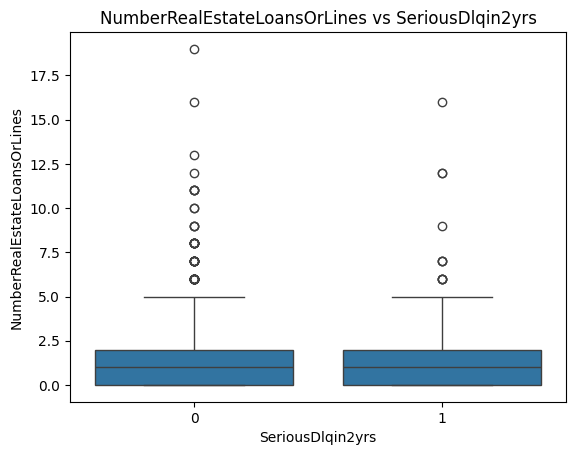

In [16]:
# 1) Análisis visual numéricas vs target
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df_clean[target], y=df_clean[col])
    plt.title(f"{col} vs {target}")
    plt.show()

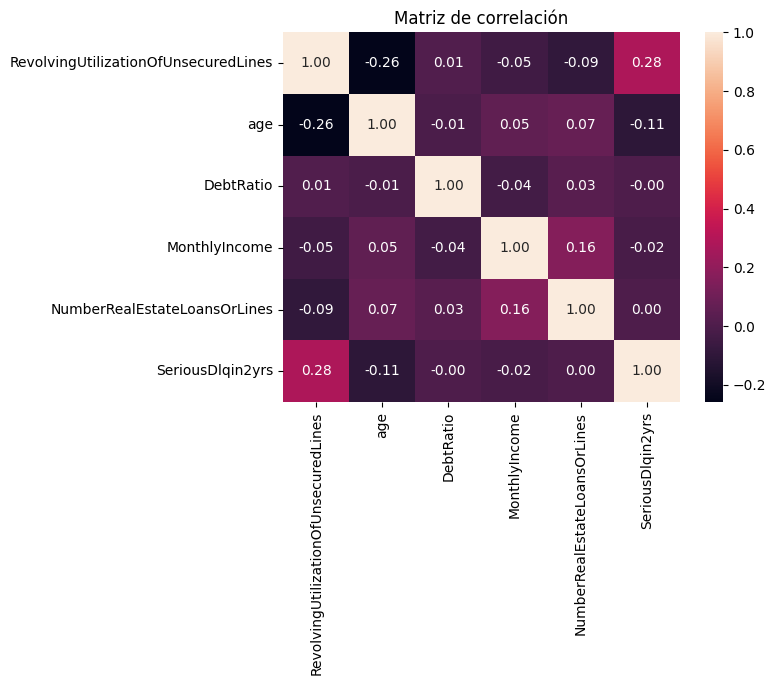

In [17]:
# 2) Correlación (Pearson)

corr_matrix = df_clean[num_cols + [target]].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [18]:
# Filtrado por umbral de correlación absoluta con target
corr_target = corr_matrix[target].drop(target)
selected_by_corr = corr_target[abs(corr_target) > 0.05].index.tolist()

print("\nFeatures seleccionadas por correlación (|corr| > 0.05):")
print(selected_by_corr)


Features seleccionadas por correlación (|corr| > 0.05):
['RevolvingUtilizationOfUnsecuredLines', 'age']


In [19]:
# 3) Análisis de covarianza
cov_matrix = df_clean[num_cols + [target]].cov()

cov_target = cov_matrix[target].drop(target)
selected_by_cov = cov_target[abs(cov_target) > 0.01].index.tolist()

print("\nFeatures seleccionadas por covarianza (|cov| > 0.01):")
print(selected_by_cov)


Features seleccionadas por covarianza (|cov| > 0.01):
['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']


C:\Users\rukas\AppData\Local\Temp\ipykernel_30440\2898845637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)[target]


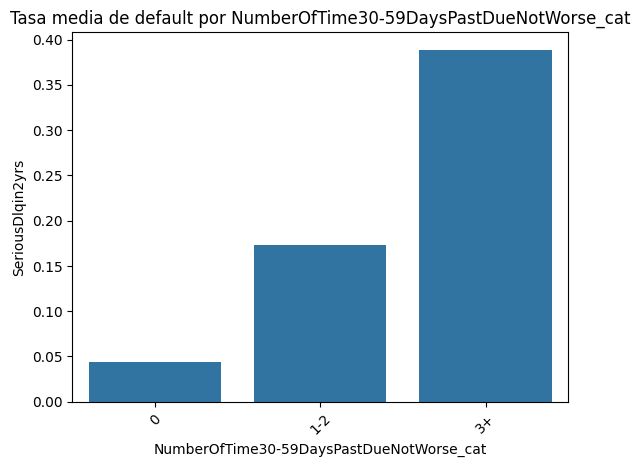

C:\Users\rukas\AppData\Local\Temp\ipykernel_30440\2898845637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)[target]


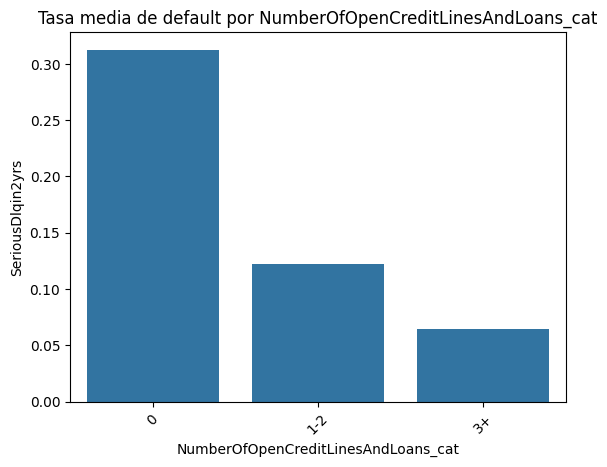

C:\Users\rukas\AppData\Local\Temp\ipykernel_30440\2898845637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)[target]


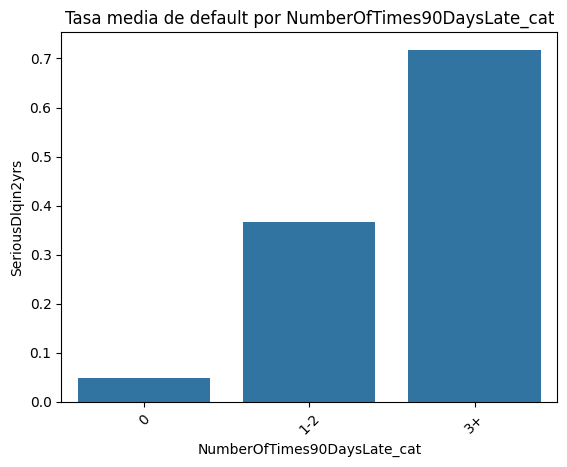

C:\Users\rukas\AppData\Local\Temp\ipykernel_30440\2898845637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)[target]


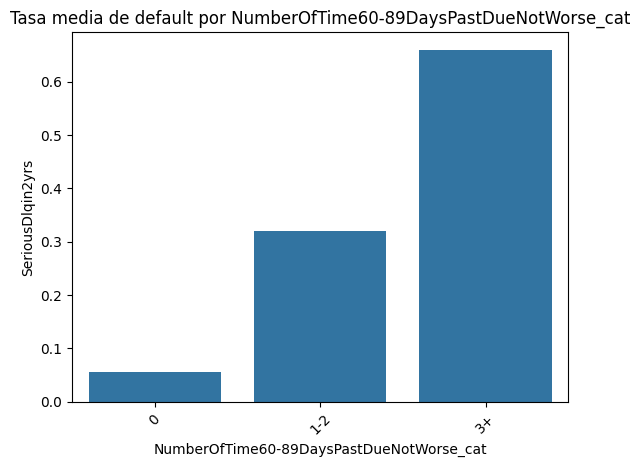

C:\Users\rukas\AppData\Local\Temp\ipykernel_30440\2898845637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)[target]


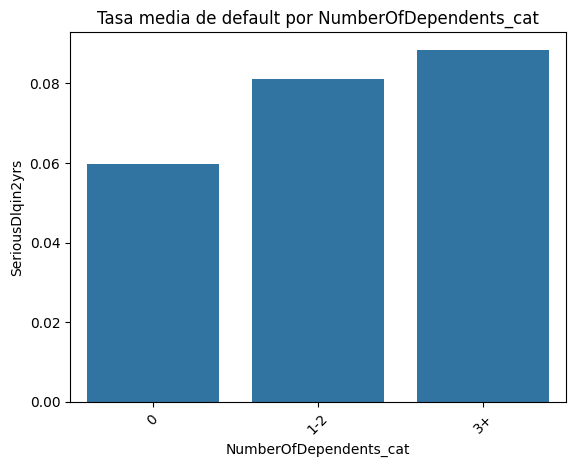


2.1 completado.


In [20]:
# 4) Análisis visual categóricas vs target

for col in cat_cols:
    plt.figure()
    prop_df = (
        df_clean.groupby(col)[target]
        .mean()
        .reset_index()
        .sort_values(target, ascending=False)
    )
    sns.barplot(x=col, y=target, data=prop_df)
    plt.title(f"Tasa media de default por {col}")
    plt.xticks(rotation=45)
    plt.show()

print("\n2.1 completado.")

In [49]:
# Si tuviera que elegir

features_2_1 = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTimes90DaysLate_cat',
    'NumberOfTime60-89DaysPastDueNotWorse_cat',
    'NumberOfTime30-59DaysPastDueNotWorse_cat',
    'NumberOfOpenCreditLinesAndLoans_cat'
]

In [23]:
X = df_clean.drop(columns=target)
y = df_clean[target]

In [24]:
# 2.2
# 1) SelectKBest para numéricas (ANOVA)
k_num = min(6, len(num_cols))

selector_num = SelectKBest(score_func=f_classif, k=k_num)
selector_num.fit(X[num_cols], y)

scores_num = pd.Series(selector_num.scores_, index=num_cols).sort_values(ascending=False)
print("\nScores ANOVA (numéricas):")
print(scores_num)

top_num_features = scores_num.head(3).index.tolist()  # nos quedamos con máx 3 numéricas
print("\nTop numéricas seleccionadas:")
print(top_num_features)


Scores ANOVA (numéricas):
RevolvingUtilizationOfUnsecuredLines    1007.740824
age                                      134.446536
MonthlyIncome                              5.824786
DebtRatio                                  0.032798
NumberRealEstateLoansOrLines               0.020601
dtype: float64

Top numéricas seleccionadas:
['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']


In [25]:
# 2) SelectKBest para categóricas (Mutual Information)
# OneHot para poder aplicar MI
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])

encoded_feature_names = encoder.get_feature_names_out(cat_cols)

mi_scores = mutual_info_classif(X_cat_encoded, y, discrete_features=True)

mi_series = pd.Series(mi_scores, index=encoded_feature_names).sort_values(ascending=False)

print("\nScores Mutual Information (categóricas codificadas):")
print(mi_series.head(10))


Scores Mutual Information (categóricas codificadas):
NumberOfTimes90DaysLate_cat_1-2                 0.018095
NumberOfTimes90DaysLate_cat_3+                  0.014343
NumberOfTime60-89DaysPastDueNotWorse_cat_1-2    0.014164
NumberOfTime30-59DaysPastDueNotWorse_cat_1-2    0.011035
NumberOfTime30-59DaysPastDueNotWorse_cat_3+     0.008898
NumberOfTime60-89DaysPastDueNotWorse_cat_3+     0.004558
NumberOfOpenCreditLinesAndLoans_cat_3+          0.002830
NumberOfOpenCreditLinesAndLoans_cat_1-2         0.001190
NumberOfDependents_cat_1-2                      0.000482
NumberOfDependents_cat_3+                       0.000274
dtype: float64


In [26]:
# Agrupar por variable original (sumamos MI por categoría)
mi_grouped = {}
for col in cat_cols:
    related_cols = [c for c in encoded_feature_names if c.startswith(col)]
    mi_grouped[col] = mi_series[related_cols].sum()

mi_grouped_series = pd.Series(mi_grouped).sort_values(ascending=False)

print("\nMutual Information agregada por variable categórica:")
print(mi_grouped_series)

top_cat_features = mi_grouped_series.head(3).index.tolist()  # máx 3 categóricas
print("\nTop categóricas seleccionadas:")
print(top_cat_features)



Mutual Information agregada por variable categórica:
NumberOfTimes90DaysLate_cat                 0.032439
NumberOfTime30-59DaysPastDueNotWorse_cat    0.019933
NumberOfTime60-89DaysPastDueNotWorse_cat    0.018722
NumberOfOpenCreditLinesAndLoans_cat         0.004021
NumberOfDependents_cat                      0.000756
dtype: float64

Top categóricas seleccionadas:
['NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat']


In [29]:
# Lista final 2.2
features_2_2 = top_num_features + top_cat_features

print("\nFeatures Primera División (2.2):")
print(features_2_2)


Features Primera División (2.2):
['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat']


In [30]:
# 2.3 SelectFromModel

# OneHotEncoding manual
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])
encoded_cat_names = encoder.get_feature_names_out(cat_cols)


In [31]:
# Matriz final
X_final = np.hstack([X[num_cols].values, X_cat_encoded])
feature_names = num_cols + list(encoded_cat_names)

In [34]:
# Modelo intermedio
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_final, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
# Importancias
importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

print("Top 10 importancias:")
print(importances.head(10))

Top 10 importancias:
RevolvingUtilizationOfUnsecuredLines            0.221290
DebtRatio                                       0.185822
MonthlyIncome                                   0.180261
age                                             0.143637
NumberOfTimes90DaysLate_cat_3+                  0.048076
NumberRealEstateLoansOrLines                    0.047981
NumberOfTimes90DaysLate_cat_1-2                 0.046200
NumberOfTime60-89DaysPastDueNotWorse_cat_1-2    0.029774
NumberOfTime30-59DaysPastDueNotWorse_cat_1-2    0.021150
NumberOfTime30-59DaysPastDueNotWorse_cat_3+     0.019999
dtype: float64


In [38]:
# SelectFromModel
selector = SelectFromModel(rf, threshold="mean", prefit=True)
selected_mask = selector.get_support()
selected_features_encoded = np.array(feature_names)[selected_mask]

# Reducir a variables originales (máx 6)
selected_original = set()

for feat in selected_features_encoded:
    if feat in num_cols:
        selected_original.add(feat)
    else:
        for col in cat_cols:
            if feat.startswith(col):
                selected_original.add(col)

features_2_3 = list(selected_original)[:6]

print("\nFeatures Primera División (2.3):")
print(features_2_3)


Features Primera División (2.3):
[np.str_('RevolvingUtilizationOfUnsecuredLines'), np.str_('MonthlyIncome'), np.str_('DebtRatio'), np.str_('age')]


In [39]:
# 2.4 — RFE (Recursive Feature Elimination)

# OneHotEncoding manual
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])
encoded_cat_names = encoder.get_feature_names_out(cat_cols)

# Matriz final
X_final = np.hstack([X[num_cols].values, X_cat_encoded])
feature_names = num_cols + list(encoded_cat_names)

In [42]:
# Modelo base
logreg = LogisticRegression(max_iter=500, solver="liblinear")

# RFE -> máximo 6 variables
rfe = RFE(estimator=logreg, n_features_to_select=6)
rfe.fit(X_final, y)

selected_mask = rfe.support_
selected_features_encoded = np.array(feature_names)[selected_mask]

print("Features seleccionadas (RFE, codificadas):")
print(selected_features_encoded)

Features seleccionadas (RFE, codificadas):
['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse_cat_3+'
 'NumberOfTimes90DaysLate_cat_1-2' 'NumberOfTimes90DaysLate_cat_3+'
 'NumberOfTime60-89DaysPastDueNotWorse_cat_1-2'
 'NumberOfTime60-89DaysPastDueNotWorse_cat_3+']


In [43]:
# Convertimos a variables originales
selected_original = set()

for feat in selected_features_encoded:
    if feat in num_cols:
        selected_original.add(feat)
    else:
        for col in cat_cols:
            if feat.startswith(col):
                selected_original.add(col)

features_2_4 = list(selected_original)

print("\nFeatures Primera División (2.4):")
print(features_2_4)


Features Primera División (2.4):
[np.str_('RevolvingUtilizationOfUnsecuredLines'), 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfTimes90DaysLate_cat']


In [45]:
# 5. Selección de las mejores features empleando SFS.

# OneHotEncoding manual
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])
encoded_cat_names = encoder.get_feature_names_out(cat_cols)

# Matriz final
X_final = np.hstack([X[num_cols].values, X_cat_encoded])
feature_names = num_cols + list(encoded_cat_names)

# Modelo base
logreg = LogisticRegression(max_iter=500, solver="liblinear")

In [46]:
# SFS forward -> máximo 6 variables
sfs = SequentialFeatureSelector(
    logreg,
    n_features_to_select=6,
    direction="forward",
    scoring="recall",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_final, y)

selected_mask = sfs.get_support()
selected_features_encoded = np.array(feature_names)[selected_mask]

print("Features seleccionadas (SFS, codificadas):")
print(selected_features_encoded)

Features seleccionadas (SFS, codificadas):
['DebtRatio' 'NumberRealEstateLoansOrLines'
 'NumberOfTime30-59DaysPastDueNotWorse_cat_3+'
 'NumberOfTimes90DaysLate_cat_1-2' 'NumberOfTimes90DaysLate_cat_3+'
 'NumberOfTime60-89DaysPastDueNotWorse_cat_1-2']


In [47]:
# Convertimos a variables originales
selected_original = set()

for feat in selected_features_encoded:
    if feat in num_cols:
        selected_original.add(feat)
    else:
        for col in cat_cols:
            if feat.startswith(col):
                selected_original.add(col)

features_2_5 = list(selected_original)

print("\nFeatures Primera División (2.5):")
print(features_2_5)


Features Primera División (2.5):
['NumberOfTime60-89DaysPastDueNotWorse_cat', np.str_('NumberRealEstateLoansOrLines'), np.str_('DebtRatio'), 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTimes90DaysLate_cat']


In [51]:
# 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

# Unimos todas las listas
all_feature_lists = [
    features_2_1,
    features_2_2,
    features_2_3,
    features_2_4,
    features_2_5
]

# Aplanamos
all_features = [feat for sublist in all_feature_lists for feat in sublist]

In [52]:
# Contamos votos
vote_counts = Counter(all_features)

vote_df = pd.DataFrame.from_dict(vote_counts, orient="index", columns=["votes"])
vote_df = vote_df.sort_values(by="votes", ascending=False)

print("Ranking de votos:")
print(vote_df)

# Nos quedamos con máximo 6 más votadas
features_2_6 = vote_df.head(6).index.tolist()

print("\nFeatures Primera División (2.6 - Hard Voting):")
print(features_2_6)

Ranking de votos:
                                          votes
RevolvingUtilizationOfUnsecuredLines          4
NumberOfTimes90DaysLate_cat                   4
NumberOfTime60-89DaysPastDueNotWorse_cat      4
NumberOfTime30-59DaysPastDueNotWorse_cat      4
age                                           3
MonthlyIncome                                 2
DebtRatio                                     2
NumberOfOpenCreditLinesAndLoans_cat           1
NumberRealEstateLoansOrLines                  1

Features Primera División (2.6 - Hard Voting):
['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'age', 'MonthlyIncome']


In [56]:
target = "SeriousDlqin2yrs"

X_full = df_clean.drop(columns=target)
y = df_clean[target]

# Modelos
models = {
    "Logistic": LogisticRegression(max_iter=500, solver="liblinear"),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

feature_sets = {
    "2_1": features_2_1,
    "2_2": features_2_2,
    "2_3": features_2_3,
    "2_4": features_2_4,
    "2_5": features_2_5,
    "2_6": features_2_6
}


In [57]:
results = []

for model_name, model in models.items():
    for set_name, features in feature_sets.items():
        
        X_subset = X_full[features]
        
        # Separar numéricas y categóricas
        num_cols = X_subset.select_dtypes(include=["int64", "float64"]).columns.tolist()
        cat_cols = X_subset.select_dtypes(include=["category"]).columns.tolist()
        
        # OneHot manual
        if len(cat_cols) > 0:
            encoder = OneHotEncoder(drop="first", sparse_output=False)
            X_cat = encoder.fit_transform(X_subset[cat_cols])
            X_num = X_subset[num_cols].values
            X_final = np.hstack([X_num, X_cat])
        else:
            X_final = X_subset.values
        
        scores = cross_val_score(
            model,
            X_final,
            y,
            cv=5,
            scoring="recall",
            n_jobs=-1
        )
        
        results.append([
            model_name,
            set_name,
            scores.mean()
        ])

results_df = pd.DataFrame(results, columns=["Model", "Feature_Set", "Mean_Recall"])
results_df = results_df.sort_values(by="Mean_Recall", ascending=False)

print(results_df)

               Model Feature_Set  Mean_Recall
9       RandomForest         2_4     0.230120
10      RandomForest         2_5     0.228916
7       RandomForest         2_2     0.204819
11      RandomForest         2_6     0.200000
6       RandomForest         2_1     0.198795
13  GradientBoosting         2_2     0.178313
17  GradientBoosting         2_6     0.178313
12  GradientBoosting         2_1     0.174699
15  GradientBoosting         2_4     0.173494
0           Logistic         2_1     0.168675
3           Logistic         2_4     0.167470
4           Logistic         2_5     0.155422
16  GradientBoosting         2_5     0.148193
1           Logistic         2_2     0.130120
5           Logistic         2_6     0.130120
8       RandomForest         2_3     0.063855
14  GradientBoosting         2_3     0.045783
2           Logistic         2_3     0.006024


SyntaxError: invalid syntax (3589086247.py, line 2)

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.